In [2]:
import pandas as pd
import json
from bs4 import BeautifulSoup
import requests

In [36]:
df = pd.read_csv('speaker.csv')

In [37]:
df.head()

,Unnamed: 0,speaker,wiki_link,description,true,mostly_true,half_true,mostly_false,false,pants_on_fire
0,0,Alex Padilla,https://en.wikipedia.org/wiki/Alex Padilla,Alex Padilla was appointed to fill a U.S. Sena...,0,1,0,0,0,0
1,1,Campaign for America's Future,https://en.wikipedia.org/wiki/ Campaign for Am...,The Campaign for America's Future bills itself...,0,0,0,0,0,1
2,2,Juan Williams,https://en.wikipedia.org/wiki/Juan Williams,Juan Williams is a Fox pundit.,1,1,3,2,0,0
3,3,Matt Tighe,https://en.wikipedia.org/wiki/Matt Tighe,Matt Tighe is the campaign manager for Democra...,0,0,0,1,0,0
4,4,Brent Barton,https://en.wikipedia.org/wiki/Brent Barton,Brent Barton is an attorney and former state r...,0,0,0,1,0,0


In [41]:
df.speaker = df.speaker.apply(lambda x: x.strip())

In [67]:
df['total'] = df[['true', 'mostly_true', 'half_true', 'mostly_false', 'false', 'pants_on_fire']].sum(axis = 1)

In [24]:
df.total.value_counts()

1     2790
2      681
3      298
4      185
5      113
6       72
8       53
7       49
9       32
10      26
11      26
15      19
12      18
0       17
16      17
18      16
13      15
17      15
14      15
19      14
21      10
23       9
24       8
20       7
26       6
22       6
29       5
25       4
27       4
34       3
33       3
28       3
32       3
31       2
30       2
36       2
41       1
35       1
Name: total, dtype: int64

In [4]:
f = open('executive.json')
exe = json.load(f)
f.close()

In [6]:
f = open('legislators-current.json')
legis_curr = json.load(f)
f.close()

In [8]:
f = open('legislators-historical.json')
legis_his = json.load(f)
f.close()

In [46]:
df = df.drop_duplicates()

In [47]:
speaker = df.speaker

In [48]:
any(speaker == 'Facebook posts')

True

In [49]:
speaker_names = speaker.value_counts().keys()

In [50]:
duplicate_names = []
for i in range(len(speaker_names)):
    if speaker.value_counts()[i] == 2:
        duplicate_names.append(speaker_names[i])

In [51]:
duplicate_names

['Robin Wright',
 'John Kennedy',
 'Mike Murphy',
 'Mike Rogers',
 'Mark Harris',
 'Michael Williams',
 'Robert Puente',
 'Duncan Hunter',
 'John Taylor',
 'Jeff Stone']

In [15]:
f = lambda x: x.split(' ')
speaker_names = [f(x) for x in speaker_names]

In [17]:
party = []

for row in speaker_names:
    if len(row) > 2:
        party.append('None')
    
    else:
        first = row[0]
        last = row[1]
        
        p = 'None'
        for item in exe:
            if item['name']['first'] == first and item['name']['last'] == last:
                p = item['terms'][0]['party']
                
        if p == 'None':
            for item in legis_curr:
                if item['name']['first'] == first and item['name']['last'] == last:
                    p = item['terms'][0]['party']
                    
        if p == 'None':
            for item in legis_his:
                if item['name']['first'] == first and item['name']['last'] == last:
                    if 'party' in item['terms'][0].keys():
                        p = item['terms'][0]['party']                    
        
        party.append(p)

In [19]:
party.count('None')

4007

In [57]:
def wiki_crawler(url):
    
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'lxml')
    
    tr = soup.find_all('tr')
    
    for item in tr:
        infolabel = item.find(class_ = 'infobox-label')
        
        if infolabel != None:
            
            if infolabel.text == 'Political party':
                party = item.find(class_ = 'infobox-data').text
                break
                
    return party

In [58]:
party = []
fail = []

count = 0
for row in df.iloc:
    count += 1
    if count % 50 == 0:
        print(count)
    url = row.wiki_link
    p = 'None'
    
    try: 
        p = wiki_crawler(url)
    except:
        fail.append(row.speaker)
        
    party.append(p)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550


In [74]:
party

['Democratic',
 'None',
 'Democratic[1]',
 'None',
 'Democratic',
 'Republican',
 'Republican',
 'None',
 'American Independent Party (2015–present)',
 'Democratic',
 'Democratic',
 'Democratic',
 'None',
 'None',
 'Republican',
 'None',
 'Republican',
 'Republican',
 'Republican',
 'Independent (2021–present)',
 'Democratic',
 'Democratic (before 1984)Republican (1984–present)',
 'Republican',
 'Democratic',
 'Democratic',
 'None',
 'None',
 'Republican',
 'None',
 'None',
 'Democratic',
 'None',
 'None',
 'Independent (2021-present)[1]',
 'None',
 'None',
 'None',
 'Republican',
 'None',
 'None',
 'None',
 'Democratic',
 'None',
 'Republican',
 'Democratic',
 'Democratic',
 'Republican',
 'None',
 'None',
 'None',
 'Democratic',
 'Democratic',
 'None',
 'None',
 'Democratic',
 'None',
 'Republican',
 'Democratic',
 'None',
 'None',
 'Republican',
 'None',
 'Republican',
 'None',
 'None',
 'None',
 'Democratic',
 'Democratic',
 'Democratic',
 'Republican',
 'None',
 'None',
 'Republic

In [52]:
train = pd.read_csv('train.tsv',sep='\t', header = None)
test = pd.read_csv('test.tsv',sep='\t', header = None)
valid = pd.read_csv('valid.tsv',sep='\t', header = None)

In [53]:
liar = train.append(test).append(valid)

In [54]:
liar.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [5]:
liar.iloc[:,4].value_counts()

barack-obama                      611
donald-trump                      343
hillary-clinton                   297
mitt-romney                       212
john-mccain                       189
                                 ... 
burger-king                         1
paul-babeu                          1
kal-penn                            1
our-city-our-safety-our-choice      1
sal-esquivel                        1
Name: 4, Length: 3309, dtype: int64

In [6]:
''.join(liar.iloc[3,4].lower().split('-'))

'blogposting'

In [107]:
''.join(speaker[0].lower().split(' '))

'alexpadilla'

In [142]:
liar.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [55]:
liar = liar.dropna(subset = [4])

In [56]:
liar_party = []
for i in speaker:
    party = 'none'
    name = ''.join(i.lower().split(' '))
    for j in range(len(liar)):
        
        liar_name = ''.join(liar.iloc[j,4].lower().split('-'))
        
        if name == liar_name:
            print(1)
            party = liar.iloc[j,7]
            break
    liar_party.append(party)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [147]:
liar_party.count('none')

2495

In [148]:
len(speaker)

4550

In [59]:
for i in range(len(party)):
    if party[i] == None:
        party[i] = 'none'

In [60]:
for i in range(len(liar_party)):
    if liar_party[i] == 'none':
        liar_party[i] = party[i]

In [63]:
df['party'] = liar_party

In [68]:
df.head(30)

,Unnamed: 0,speaker,wiki_link,description,true,mostly_true,half_true,mostly_false,false,pants_on_fire,party,total
0,0,Alex Padilla,https://en.wikipedia.org/wiki/Alex Padilla,Alex Padilla was appointed to fill a U.S. Sena...,0,1,0,0,0,0,Democratic,1
1,1,Campaign for America's Future,https://en.wikipedia.org/wiki/ Campaign for Am...,The Campaign for America's Future bills itself...,0,0,0,0,0,1,None,1
2,2,Juan Williams,https://en.wikipedia.org/wiki/Juan Williams,Juan Williams is a Fox pundit.,1,1,3,2,0,0,Democratic[1],7
3,3,Matt Tighe,https://en.wikipedia.org/wiki/Matt Tighe,Matt Tighe is the campaign manager for Democra...,0,0,0,1,0,0,democrat,1
4,4,Brent Barton,https://en.wikipedia.org/wiki/Brent Barton,Brent Barton is an attorney and former state r...,0,0,0,1,0,0,democrat,1
5,5,Jack Kingston,https://en.wikipedia.org/wiki/Jack Kingston,"Jack Kingston, a Republican, is a former U.S. ...",1,3,4,3,2,0,republican,13
6,6,Erika Harold,https://en.wikipedia.org/wiki/Erika Harold,Erika Harold is a Republican candidate in the ...,0,0,0,1,0,0,Republican,1
7,7,Sheila Resseger,https://en.wikipedia.org/wiki/Sheila Resseger,"Sheila Resseger, of Cranston, Rhode Island, is...",0,1,0,0,0,0,None,1
8,8,Chuck Baldwin,https://en.wikipedia.org/wiki/Chuck Baldwin,"Chuck Baldwin is a radio broadcaster, syndicat...",0,0,0,0,0,1,republican,1
9,9,Lou Greenwald,https://en.wikipedia.org/wiki/Lou Greenwald,Lou Greenwald is a Democratic state Assemblyma...,2,2,1,0,1,2,democrat,8


In [93]:
non = 0

for row in df.iloc:
    if row.party == 'None':
        non += row.total
        
non

2567

In [76]:
df_party = list(df.party)

In [77]:
df_party.count('None')

1864

In [86]:
for i in range(len(df)):
    if df_party[i] == 'None':
        try:
            if 'repub' in df.iloc[i].description.lower():
                df_party[i] = 'republican'

            elif 'demo' in df.iloc[i].description.lower():
                df_party[i] = 'democratic'
        except:
            print('None')

None
None
None
None
None
None
None


In [88]:
df.party = df_party

In [92]:
df.party.value_counts()

None                                                   1587
republican                                             1072
democrat                                                829
Republican                                              279
Democratic                                              262
                                                       ... 
Republican (2018–present)                                 1
Independent (2017–present)                                1
Republican (1998–present)                                 1
Republican (before 2018)Constitution (2018–present)       1
None (previously Republican)[3][4]                        1
Name: party, Length: 96, dtype: int64

In [94]:
for row in df.iloc:
    if row.party == 'None':
        print(row.speaker)

Campaign for America's Future
Sheila Resseger
Lights For Liberty
Keep Austin Healthy PAC
Michael Adams
Patrick Moore
Various media reports 2
Defenders of Wildlife Action Fund
Marla Stephens
Brit Hume
Tom Brady
TheNewYorkEvening.com
J. Christian Adams
Association of Mature American Citizens
Karen Brinson Bell
Greg Hauenstein
Anissa Naouai
Roland Martin
University of Oregon
Antonin Scalia
Metro Atlanta Voter Education Network
Citizens for a Progressive Wisconsin
Jeff Scrima
Texas Right to Life
Miami Seaport Alliance
Brian Tyler Cohen
National Partnership for Women & Families
Mt. Hood Community College
Mark O'Mara
Freedom Defense Advocates
Lisa Bloom
Mike Plant
Phil McGraw
Walmis2018.com
Rebuilding America Now
President Trump's lawyers
Libertarian Party of Broward County
It's Still a Bad Idea
Deepwater Wind
Anonymous Caller
National Association of Manufacturers
Recovery.gov
Susan Pitman
Enough Already Wisconsin, Inc.
Students, Parents and Teachers supporting Marshall Tuck
Dan Kaufman
Marc

Newstarget
Sherill Sellman
Adan Ballesteros
Georgia House Democratic Caucus on behalf of Elena Parent
E. Frank Stephenson
Kathy Miller
Fareed Zakaria
Heritage Action
Georgia Lottery
Kendall Jones
America Today
ActionAid UK
John Pistole
Social Media
Keith Parker
Charlie Kirk
Brandon Morse
Simone Gold
Oregon Center for Public Policy
Thomas Anderson
Flash 24 Daily
Michelle Wolf
Aubrey Huff
AmericanJournalReview.com
James Rockall
Environmental Defense Fund Action
Melanie D'Arrigo
Project Veritas
With Honor
Erin Burnett
Habitat for Humanity of Broward
Dana Milbank
Children's Healthcare of Atlanta
James Jolly
James Moore
Florida Chamber of Commerce
Jose Carrillo
Sabino "Pio" Renteria
Tammy Hall
Charles Kuck
Georgia Craft Brewers Guild
Clackamas County Commission
Tim Cook
Kitty Boitnott
People's Majority
Iowa GOP state legislators
Scott Jenkins
Nova magazine
Cindi Castilla
Women On the Wall
Matt Rinker
American Postal Workers Union
Don Francis
Dream Defenders
Fix Austin Schools
Ohio Federatio

Matt Wuerker
Deadspin
Americanproud.info
William Taylor
Wesley Smith
My City Bikes
Brian Kolfage
SupremeInsider.com
Samuel DeMaio
AFL-CIO
FreedomCrossroads.us
Uncle Sam's Misguided Children
Jerry Jones
Realtimepolitics
American Civil Liberties Union of Florida
ABC NEWS-US
Robert Kraig
Don't Let Florida Go To Pot
Ora Houston
Duffel Blog
NY FOX News
Heineken
Advancing Wisconsin
Lawrence O'Donnell
VoteVets.org
U.S. Chamber of Commerce
Joe Volk
Calvine Rollins
Marcus Low
Scott Beck
defense-usa.site
Diego Arene-Morley
Lindsay James
Burger King
Jamie Weinstein
Joe Davis, Sr.
David Beckham
Reza Aslan
Dorothy Brown
Yard sign
Citizens United
Jason Haas
William Devereaux
New Georgia Encyclopedia
Americans for Prosperity
Nina Perales
Wisconsin Corn Growers Association
Steven King
Howard Fineman
60 Plus Association
The Coalition for Public Schools
Illinois Rising Action
CNN
Internet commenters
The Breaking Dawn
Florida Agency for Health Care Administration
Citizens for a Strong America
Emails
Vets

In [ ]:
for i 

In [95]:
df.to_csv('speaker_info.csv')

In [37]:
def personality_crawler():
    speaker, party, link = [], [], []
    
    url = 'https://www.politifact.com/personalities/'
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'lxml')
    
    for item in soup.find_all(class_ = 'c-chyron'):
        speaker.append(item.find(class_ = 'c-chyron__value').text.strip())
        party.append(item.find(class_ = 'c-chyron__subline').text.strip())
        link.append('https://www.politifact.com'+item.find('a', href = True)['href'])
        
    return speaker, party, link

In [38]:
result = personality_crawler()

In [39]:
personality = pd.DataFrame(list(zip(result[0], result[1], result[2])), columns = ['speaker', 'party', 'link'])

In [41]:
personality.head()

,speaker,party,link
0,13th District GOP slate,Republican,https://www.politifact.com/personalities/13th-...
1,18% of the American public,None,https://www.politifact.com/personalities/18-pe...
2,60 Plus Association,None,https://www.politifact.com/personalities/60-pl...
3,AARP,None,https://www.politifact.com/personalities/AARP/
4,Greg Abbott,Republican,https://www.politifact.com/personalities/greg-...


In [16]:
soup.find_all(class_ = 'c-chyron')[0].find(class_ = 'c-chyron__value').text.strip()

'13th District GOP slate'

In [32]:
soup.find_all(class_ = 'c-chyron')[0].find('a', href = True)['href']

'/personalities/13th-district-gop-slate/'

In [3]:
personality = pd.read_csv('personality.csv')

In [53]:
personality_demo = personality[personality['party'] == 'Democrat']

In [54]:
personality_demo

,Unnamed: 0,speaker,party,link,article_link
6,6,Huma Abedin,Democrat,https://www.politifact.com/personalities/huma-...,[]
7,7,Chris Abele,Democrat,https://www.politifact.com/personalities/chris...,['https://www.politifact.com/factchecks/2017/o...
8,8,Stacey Abrams,Democrat,https://www.politifact.com/personalities/stace...,['https://www.politifact.com/factchecks/2022/f...
21,21,Sam Adams,Democrat,https://www.politifact.com/personalities/sam-a...,['https://www.politifact.com/factchecks/2013/j...
22,22,Alma Adams,Democrat,https://www.politifact.com/personalities/alma-...,['https://www.politifact.com/factchecks/2022/j...
...,...,...,...,...,...
4817,4817,Joe Zepecki,Democrat,https://www.politifact.com/personalities/joe-z...,['https://www.politifact.com/factchecks/2014/j...
4818,4818,Rob Zerban,Democrat,https://www.politifact.com/personalities/rob-z...,['https://www.politifact.com/factchecks/2012/o...
4819,4819,Graeme Zielinski,Democrat,https://www.politifact.com/personalities/graem...,['https://www.politifact.com/factchecks/2012/m...
4821,4821,Jeffrey Zients,Democrat,https://www.politifact.com/personalities/jeffr...,['https://www.politifact.com/factchecks/2021/m...


In [55]:
len(personality_demo)

1316

In [61]:
personality_demo

,Unnamed: 0,speaker,party,link,article_link
6,6,Huma Abedin,Democrat,https://www.politifact.com/personalities/huma-...,[]
7,7,Chris Abele,Democrat,https://www.politifact.com/personalities/chris...,['https://www.politifact.com/factchecks/2017/o...
8,8,Stacey Abrams,Democrat,https://www.politifact.com/personalities/stace...,['https://www.politifact.com/factchecks/2022/f...
21,21,Sam Adams,Democrat,https://www.politifact.com/personalities/sam-a...,['https://www.politifact.com/factchecks/2013/j...
22,22,Alma Adams,Democrat,https://www.politifact.com/personalities/alma-...,['https://www.politifact.com/factchecks/2022/j...
...,...,...,...,...,...
4817,4817,Joe Zepecki,Democrat,https://www.politifact.com/personalities/joe-z...,['https://www.politifact.com/factchecks/2014/j...
4818,4818,Rob Zerban,Democrat,https://www.politifact.com/personalities/rob-z...,['https://www.politifact.com/factchecks/2012/o...
4819,4819,Graeme Zielinski,Democrat,https://www.politifact.com/personalities/graem...,['https://www.politifact.com/factchecks/2012/m...
4821,4821,Jeffrey Zients,Democrat,https://www.politifact.com/personalities/jeffr...,['https://www.politifact.com/factchecks/2021/m...


In [83]:
count = 0
for row in personality_demo.iloc:
    if row.article_link != '[]':
        count+=1
count

1226

In [56]:
personality_rep = personality[personality['party'] == 'Republican']

In [58]:
len(personality_rep)

1479

In [84]:
count = 0
for row in personality_rep.iloc:
    if row.article_link != '[]':
        count+=1
count

1400

In [85]:
len(personality)

4827

In [86]:
df = pd.read_csv('politifact.csv')

In [88]:
df.factchecker.value_counts()

Louis Jacobson    1840
Ciara O'Rourke    1199
Tom Kertscher     1194
Jon Greenberg      961
Amy Sherman        952
                  ... 
Nicole Chavez        1
Lauren Richey        1
Rebecca Jerome       1
Cade Moisey          1
Alex Leary           1
Name: factchecker, Length: 544, dtype: int64

In [89]:
from matplotlib import pyplot as plt

<BarContainer object of 544 artists>

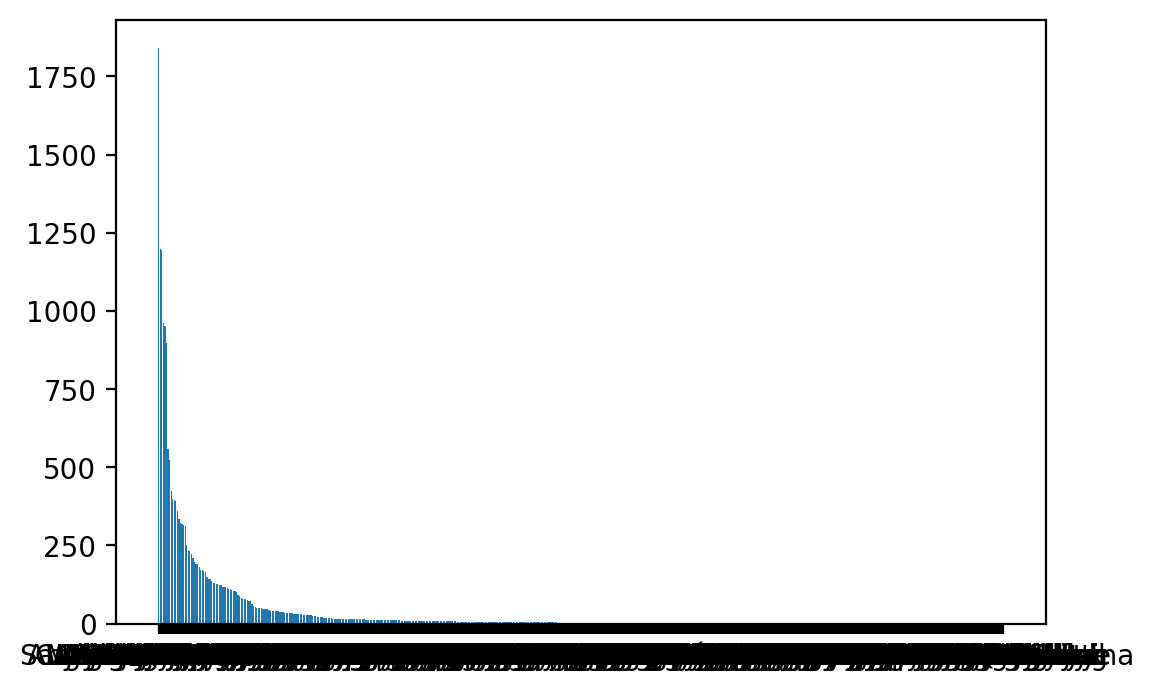

In [94]:
plt.figure(dpi = 200)
plt.bar(df.factchecker.value_counts().index, df.factchecker.value_counts())

In [101]:
count = 1
for i in personality.speaker.value_counts():
    if i > 1:
        count+=1
        
count

12

In [100]:
len(personality.speaker.value_counts())

4816

In [17]:
personality.iloc[4].article_link[1:-1].split(',')[0].strip("'")[0]

'h'

In [ ]:
with open('a.txt','a') as f:
    f.write(f'{1}\n')